## Curvature simulation

In [1]:
from lace_manager.emulator import p1d_archive
from lace_manager.emulator import test_simulation
from lace_manager.emulator import gp_emulator
from lace_manager.sampler import emcee_sampler
from lace_manager.setup_simulations import read_genic
from lace_manager.cosmo import camb_cosmo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

 /home/chris/.local/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning:Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.


In [2]:
font = {'size'   : 24}
matplotlib.rc('font', **font)
plt.rc('text', usetex=False)
plt.rc('font', family='FreeSerif')
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [3]:
## Archive without z=3
skewers_label='Ns500_wM0.05'
basedir="/lace/emulator/sim_suites/Australia20/"
p1d_label=None
# load Latin hypercube in simulation space
archive=p1d_archive.archiveP1D(basedir=basedir,z_max=4,drop_sim_number=1,
                            drop_tau_rescalings=True,
                            drop_temp_rescalings=True,skewers_label=skewers_label)
zmin=2
zmax=4

In [4]:
param_1="gamma"
param_2="sigT_Mpc"
param_3="Delta2_p"
param_4="mF"
param_5="n_p"
param_6="kF_Mpc"

In [5]:
emu_data=archive.data
Nemu=len(emu_data)
# figure out values of param_1,param_2 in arxiv
emu_1=np.array([emu_data[i][param_1] for i in range(Nemu)])
emu_2=np.array([emu_data[i][param_2] for i in range(Nemu)])
emu_3=np.array([emu_data[i][param_3] for i in range(Nemu)])
emu_4=np.array([emu_data[i][param_4] for i in range(Nemu)])
emu_5=np.array([emu_data[i][param_5] for i in range(Nemu)])
emu_6=np.array([emu_data[i][param_6] for i in range(Nemu)])
emu_z=np.array([emu_data[i]['z'] for i in range(Nemu)])

In [8]:
## Now get data for the test sim
Test=test_simulation.TestSimulation(basedir,"curved_1")

test_1=np.empty(len(Test.zs))
test_2=np.empty(len(Test.zs))
test_3=np.empty(len(Test.zs))
test_4=np.empty(len(Test.zs))
test_5=np.empty(len(Test.zs))
test_6=np.empty(len(Test.zs))


for aa,zz in enumerate(Test.zs):
    emu_call=Test.get_emulator_calls(zz)
    test_1[aa]=emu_call[param_1]
    test_2[aa]=emu_call[param_2]
    test_3[aa]=emu_call[param_3]
    test_4[aa]=emu_call[param_4]
    test_5[aa]=emu_call[param_5]
    test_6[aa]=emu_call[param_6]

In [9]:
viridis = cm.get_cmap('viridis', 200)

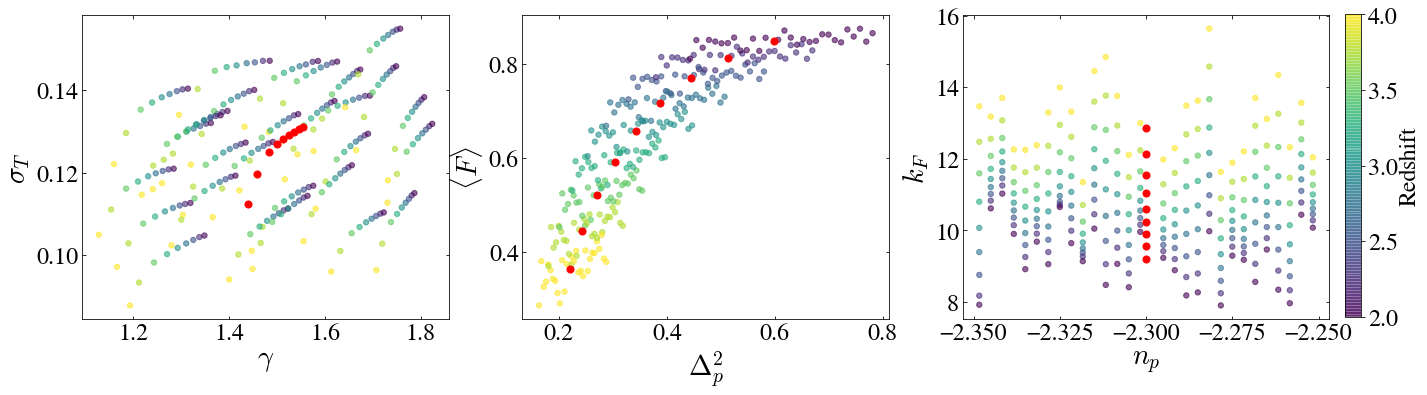

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(11,5.6))

axes[0].scatter(emu_1,emu_2,c=emu_z,s=29,vmin=zmin, vmax=zmax,cmap=viridis,alpha=0.6)
axes[0].scatter(test_1,test_2,c="red",marker="o",s=50,vmin=zmin, vmax=zmax)
sca=axes[1].scatter(emu_3,emu_4,c=emu_z,s=29,vmin=zmin, vmax=zmax,cmap=viridis,alpha=0.6)
axes[1].scatter(test_3,test_4,c="red",marker="o",s=50,vmin=zmin, vmax=zmax)
axes[2].scatter(emu_5,emu_6,c=emu_z,s=29,vmin=zmin, vmax=zmax,cmap=viridis,alpha=0.6)
axes[2].scatter(test_5,test_6,c="red",marker="o",s=50,vmin=zmin, vmax=zmax)

fig.subplots_adjust(right=1.7)
cbar_ax = fig.add_axes([1.72, 0.131, 0.02, 0.75])
cbar=plt.colorbar(sca,cax=cbar_ax)
cbar.set_label("Redshift", labelpad=+1)

#axes[0].scatter(emu_1_z3,emu_2_z3,c="red",s=29,marker="+")
#sca=axes[1].scatter(emu_3_z3,emu_4_z3,c="red",s=29,marker="+")
axes[0].set_ylabel(r"$\sigma_T$",fontsize=28)
axes[0].set_xlabel(r"$\gamma$",fontsize=28)
axes[1].set_xlabel(r"$\Delta^2_p$",fontsize=28)
axes[1].set_ylabel(r"$\langle F\rangle$",fontsize=28)

axes[2].set_xlabel(r"$n_p$",fontsize=28)
axes[2].set_ylabel(r"$k_F$",fontsize=28)

axes[0].tick_params(direction="in",top=True,right=True)
axes[1].tick_params(direction="in",top=True,right=True)
axes[2].tick_params(direction="in",top=True,right=True)
plt.subplots_adjust(wspace=0.2)
#plt.tight_layout()
#plt.savefig("../Figures/training_points.pdf", bbox_inches = "tight")
plt.show()

In [11]:
## Next step is to look at emulator calls
## Build emulator
paramList=['mF', 'sigT_Mpc', 'gamma', 'kF_Mpc', 'Delta2_p', 'n_p']
# specify k range
kmax_Mpc=8.5
emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,z_max=zmax,
                                verbose=False,paramList=paramList,train=True,
                                asymmetric_kernel=True,rbf_only=True,
                                emu_type="k_bin",passarchive=archive,
                                kmax_Mpc=kmax_Mpc,checkHulls=True)

 /home/chris/.local/lib/python3.8/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Training GP on 261 points
Optimised



Is the training point outside the convex hull? [False]
Euclidean distance to nearest training point: 0.22606434277355655

Is the training point outside the convex hull? [False]
Euclidean distance to nearest training point: 0.22926049630658174

Is the training point outside the convex hull? [False]
Euclidean distance to nearest training point: 0.2272042357546186

Is the training point outside the convex hull? [False]
Euclidean distance to nearest training point: 0.2283772368290301

Is the training point outside the convex hull? [False]
Euclidean distance to nearest training point: 0.2317743949798839

Is the training point outside the convex hull? [False]
Euclidean distance to nearest training point: 0.23698469851055765

Is the training point outside the convex hull? [False]
Euclidean distance to nearest training point: 0.24044482602784983

Is the training point outside the convex hull? [False]
Euclidean distance to nearest training point: 0.1975291307926158

Is the training point outsi

Text(0.5, 0, '$k_\\parallel$ [1/Mpc]')

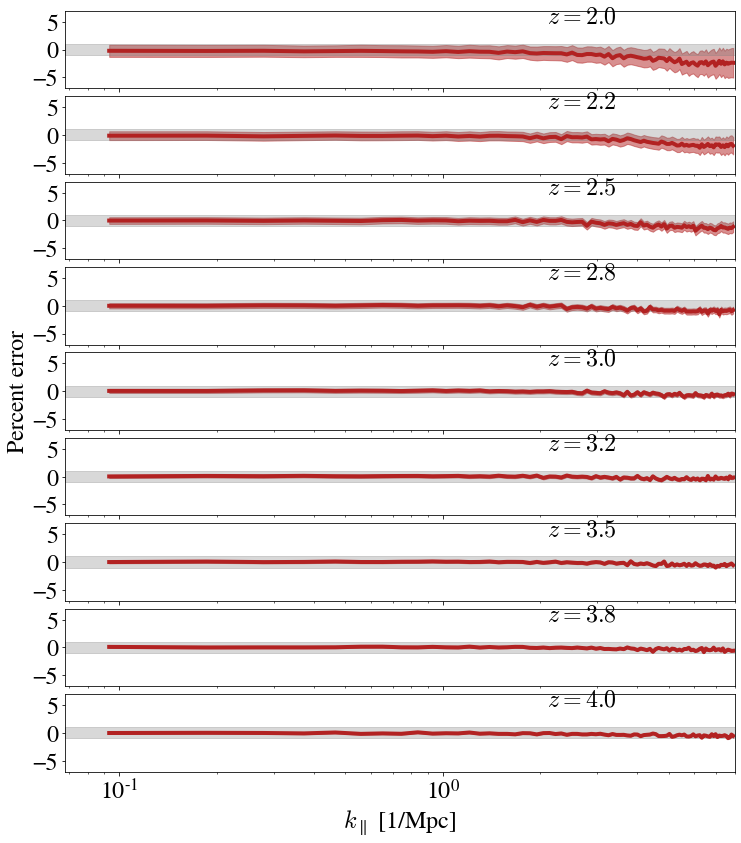

In [12]:
plt.figure(figsize=[12,14])

xmin=0.068
xmax=8

dex=0
for aa in range(0,9,1):
    plt.subplot(9,1,(aa+1))
    col = "firebrick"
    
    test_k_mpc,test_pk_mpc=Test.get_p1d_Mpc(Test.zs[aa])
    
    print("\nIs the training point outside the convex hull?", emu.check_in_hull(Test.get_emulator_calls(Test.zs[aa])))
    print("Euclidean distance to nearest training point:", emu.get_nearest_distance(Test.get_emulator_calls(Test.zs[aa])))
    pred,err=emu.emulate_p1d_Mpc(Test.get_emulator_calls(Test.zs[aa]),test_k_mpc[1:],True,Test.zs[aa])
    
    plt.plot(test_k_mpc[1:],100*((pred/test_pk_mpc[1:])-1),color=col,linewidth=4)
    #plt.plot(k_test,100*(mean_error_rbf[aa,:]),color="black")
    #plt.plot(k_test,-100*mean_error_rbf[aa,:],color="black")
    plt.fill_between(test_k_mpc[1:],100*((pred+np.sqrt(np.diag(err)))/test_pk_mpc[1:]-1),
            100*((pred-np.sqrt(np.diag(err)))/test_pk_mpc[1:]-1),alpha=0.5,color=col)
    plt.axhspan(-1,1,color="gray",alpha=0.3)

    #plt.axhline(0,linestyle="dashed",color="gray")
    plt.ylim(-7,7)
    #plt.legend(loc="lower right")
    ax = plt.gca()
    ax.set_xscale("log")
    plt.xlim(xmin,xmax)
    #ax.tick_params(top=True,right=True)
    
    ax.text(2.1,4.8,r"$z=%.1f$" % Test.zs[aa])

    if aa != 8:
        ax.axes.xaxis.set_ticklabels([])
        #ax.axes.yaxis.set_ticklabels([])
    if aa==4:
        plt.ylabel("Percent error")
plt.subplots_adjust(hspace=0.1)
plt.xlabel(r"$k_\parallel$ [1/Mpc]")

So we see a breakdown in the predictions at high $k_\parallel$ at low $z$, and a percent level bias at high $z$.

My first two ideas as to how this would break down are:

1. Non-linear growth being different in the curvature sim vs the flat sim, due to running of the small scale power spectrum not captured in this parameterisation. One option is to look at the running of the power spectrum in the .json files, or plot the non-linear matter power spectra at $z=3$ and see if they are significantly different
2. Another option is that the EdS approximation is breaking down at lower $z$. Although this effect is more pronounced at small scales - maybe this makes sense as it is the velocity power spectrum that is different and not accounted for.
3. The final option is some difference in the IGM we are not accounting for. It's also possible this is degenerate with changes to the IGM, I should run a chain and see how well $\Delta^2_\star$ and $n_\star$ are recovered.

In [ ]:
## First check running - compare running in the curvature sim with the running & neutrino mass sims
numass=test_simulation.TestSimulation(basedir,"nu")
run=test_simulation.TestSimulation(basedir,"running")
central=test_simulation.TestSimulation(basedir,"central")

In [ ]:
central.get_emulator_calls(3)

In [ ]:
numass.get_emulator_calls(3)

In [ ]:
run.get_emulator_calls(3)

In [ ]:
Test.get_emulator_calls(3)

In [ ]:
central.get_emulator_calls(3)

So there is no significant difference in the running. It's probably still worth looking at the non-linear power spectrum, but will leave this for now. To see whether the EdS approximation is breaking down, let's compare the difference in the growth rate and expansion rate with respect to the fiducial cosmology. Can also repeat the comparison with the neutrino simulation, and see if the curvature I have used does excessive things to the background evolution.

In [ ]:
## Get a cosmology object from the curvature sim paramfile
curved_dict=read_genic.camb_from_genic("/home/chris/Projects/LaCE/lace/emulator/sim_suites/Australia20/curved_sim/sim_plus/paramfile.genic")
curved_cosmo=camb_cosmo.get_cosmology_from_dictionary(curved_dict)

## Now for the neutrino sim for comparison
nu_dict=read_genic.camb_from_genic("/home/chris/Projects/LaCE/lace/emulator/sim_suites/Australia20/nu_sim/sim_plus/paramfile.genic")
nu_cosmo=camb_cosmo.get_cosmology_from_dictionary(nu_dict)

## h sim
h_dict=read_genic.camb_from_genic("/home/chris/Projects/LaCE/lace/emulator/sim_suites/Australia20/h_sim/sim_plus/paramfile.genic")
h_cosmo=camb_cosmo.get_cosmology_from_dictionary(h_dict)

## running sim
run_dict=read_genic.camb_from_genic("/home/chris/Projects/LaCE/lace/emulator/sim_suites/Australia20/running_sim/sim_plus/paramfile.genic")
run_cosmo=camb_cosmo.get_cosmology_from_dictionary(run_dict)

## central sim
central_dict=read_genic.camb_from_genic("/home/chris/Projects/LaCE/lace/emulator/sim_suites/Australia20/central/sim_plus/paramfile.genic")
central_cosmo=camb_cosmo.get_cosmology_from_dictionary(central_dict)

In [ ]:
central_cosmo.omegam

In [ ]:
curved_dict

In [ ]:
## How extreme is the difference in z=2 and z=4 growth and expansion rate with respect to the fiducial cosmology?
fid_cosmo=camb_cosmo.get_cosmology()

In [ ]:
fid_results=camb_cosmo.get_camb_results(fid_cosmo)
curved_results=camb_cosmo.get_camb_results(curved_cosmo)
nu_results=camb_cosmo.get_camb_results(nu_cosmo)
h_results=camb_cosmo.get_camb_results(h_cosmo)

In [ ]:
print("Fiducial H(z=2)=",fid_results.hubble_parameter(2))
print("Curved H(z=2)=",curved_results.hubble_parameter(2))
print("Neutrino H(z=2)=",nu_results.hubble_parameter(2))
print("h sim H(z=2)=",h_results.hubble_parameter(2))

So there is way more difference in the low $z$ expansion rate than in the neutrino sim. Maybe try and look at the growth rate as well now.

In [ ]:
print("Fiducial f(z=2)=",camb_cosmo.get_f_of_z(fid_cosmo,[2]))
print("Curved f(z=2)=",camb_cosmo.get_f_of_z(curved_cosmo,[2]))
print("Neutrino f(z=2)=",camb_cosmo.get_f_of_z(nu_cosmo,[2]))
print("h sim f(z=2)=",camb_cosmo.get_f_of_z(h_cosmo,[2]))

In [ ]:
k_cen,z_cen,pk_cen=camb_cosmo.get_linP_Mpc(central_cosmo,[3])
k_cur,z_cur,pk_cur=camb_cosmo.get_linP_Mpc(curved_cosmo,[3])
k_run,z_run,pk_run=camb_cosmo.get_linP_Mpc(run_cosmo,[3])

In [ ]:
plt.figure(figsize=(9,7))
plt.semilogx(k_cen,pk_cen[0]/pk_cur[0])
plt.ylim(0.7,1.3)

In [ ]:
b_z3_run=np.loadtxt("/home/chris/Testbed/genpks/running/PK-by-PART_006")
b_z3_cen=np.loadtxt("/home/chris/Testbed/genpks/central/PK-by-PART_006")

dm_z3_run=np.loadtxt("/home/chris/Testbed/genpks/running/PK-DM-PART_006")
dm_z3_cen=np.loadtxt("/home/chris/Testbed/genpks/central/PK-DM-PART_006")

## Scale for genpk
scale=(2*np.pi)/45.225

## CDM and baryon fractions to create combined power spectra (same in central and running simulations)
omc=central_cosmo.omch2/(central_cosmo.H0/100)**2
omb=central_cosmo.ombh2/(central_cosmo.H0/100)**2

f_c=omc/(omc+omb)
f_b=omb/(omc+omb)

In [ ]:
p_z3_cen=b_z3_cen[:,1]*f_b**2+dm_z3_cen[:,1]*f_c**2+2*f_b*f_c*np.sqrt(b_z3_cen[:,1]*dm_z3_cen[:,1])
p_z3_run=b_z3_run[:,1]*f_b**2+dm_z3_run[:,1]*f_c**2+2*f_b*f_c*np.sqrt(b_z3_run[:,1]*dm_z3_run[:,1])

In [ ]:
plt.figure(figsize=(11,9))
plt.title("Central sim/running sim, z=3")
plt.semilogx(k_cen,pk_cen[0]/pk_run[0],label="linear power ratio")
plt.axhspan(0.99,1.01,color="gray",alpha=0.2)
plt.semilogx(baryon_power_run[:,0]*scale,b_z3_cen[:,1]/b_z3_run[:,1],label="non-linear ratio, baryon")
plt.semilogx(baryon_power_run[:,0]*scale,dm_z3_cen[:,1]/dm_z3_run[:,1],label="non-linear ratio, cdm")
plt.semilogx(baryon_power_run[:,0]*scale,p_z3_cen/p_z3_run,label="non-linear ratio, tot")
plt.ylim(0.8,1.2)
plt.legend()

In [ ]:
## What do we see in the ICs?
ic_run=np.loadtxt("/home/chris/Testbed/genpks/running/matterpow.dat")
ic_cen=np.loadtxt("/home/chris/Testbed/genpks/central/matterpow.dat")

In [ ]:
ic_run[:,0]-ic_cen[:,0]

plt.figure(figsize=(11,9))
plt.title("Central sim/running sim, IC power spectra from CLASS")
plt.semilogx(ic_run[:,0]*0.67,ic_cen[:,1]/ic_run[:,1],label="linear power ratio")
plt.axhspan(0.99,1.01,color="gray",alpha=0.2)
plt.semilogx(baryon_power_run[:,0]*scale,baryon_power_cen[:,1]/baryon_power_run[:,1],label="non-linear ratio")
plt.ylim(0.3,1.7)
plt.legend()

This looks sus to me. Check the ICs, and redshfit evolution of this ratio

In [ ]:
## What do we see in the ICs?
b_ic_run=np.loadtxt("/home/chris/Testbed/genpks/running/PK-by-IC")
b_ic_cen=np.loadtxt("/home/chris/Testbed/genpks/central/PK-by-IC")

## What do we see in the ICs?
dm_ic_run=np.loadtxt("/home/chris/Testbed/genpks/running/PK-DM-IC")
dm_ic_cen=np.loadtxt("/home/chris/Testbed/genpks/central/PK-DM-IC")

p_ic_cen=b_z3_cen[:,1]*f_b**2+dm_ic_cen[:,1]*f_c**2+2*f_b*f_c*np.sqrt(b_ic_cen[:,1]*dm_ic_cen[:,1])
p_ic_run=b_z3_run[:,1]*f_b**2+dm_ic_run[:,1]*f_c**2+2*f_b*f_c*np.sqrt(b_ic_run[:,1]*dm_ic_run[:,1])

In [ ]:
plt.figure(figsize=(11,9))
plt.title("Central sim/running sim, baryon ICs")
plt.semilogx(k_cen,pk_cen[0]/pk_run[0],label="linear power ratio")
plt.axhspan(0.99,1.01,color="gray",alpha=0.2)
plt.semilogx(ic_genpk_run[:,0]*scale,ic_genpk_cen[:,1]/ic_genpk_run[:,1],label="non-linear ratio")
plt.ylim(0.8,1.2)
plt.legend()

In [ ]:
k_cen_99,z_cen_99,pk_cen_99=camb_cosmo.get_linP_Mpc(central_cosmo,[99])
k_run_99,z_run_99,pk_run_99=camb_cosmo.get_linP_Mpc(run_cosmo,[99])

In [ ]:
## Compare power spectra from camb_cosmo with the ICs in class
plt.figure(figsize=(11,9))
plt.title("central/running for make_class_power and camb_cosmo")
plt.semilogx(ic_run[:,0]*0.67,ic_cen[:,1]/ic_run[:,1],label="make_class_power")
plt.axhspan(0.99,1.01,color="gray",alpha=0.2)
plt.semilogx(k_cen_99,pk_cen_99[0]/pk_run_99[0],label="linear power ratio")
plt.semilogx(dm_ic_run[:,0]*scale,p_ic_cen/p_ic_run,label="particle IC power")
plt.ylim(0.3,1.7)
plt.legend()

So is this also the case for the massive neutrino sim? Are the high $k$ modes just not being modelled correctly?